## Imports

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix

In [2]:
import sys

PROJECT_PATH = '/home/adiel/full-temporal-relation'
if PROJECT_PATH not in sys.path:
    sys.path.append(PROJECT_PATH)
    
from full_temporal_relation.visualization.data import plot_relation_bars
from full_temporal_relation.data.preprocessing import load_data
from full_temporal_relation.metrics import relation_table

# Data

In [3]:
DATA_PATH = Path('../data')
TRC_RESULTS_PATH = DATA_PATH / 'TRC' / 'results'

In [4]:
gold_df = load_data(DATA_PATH/ 'MATRES' / 'platinum.txt')
eiid1_eiid2 = list(zip(gold_df['eiid1'], gold_df['eiid2']))
gold_df['unique_id'] = ['-'.join(sorted([eiid1, eiid2])) for eiid1, eiid2 in eiid1_eiid2]

gold_df

,docid,verb1,verb2,eiid1,eiid2,relation,unique_id
0,WSJ_20130322_159,apologized,happened,e1,e5,VAGUE,e1-e5
1,WSJ_20130322_159,apologized,wrapped,e1,e6,BEFORE,e1-e6
2,WSJ_20130322_159,apologized,seemed,e1,e10,BEFORE,e1-e10
3,WSJ_20130322_159,apologized,yield,e1,e11,VAGUE,e1-e11
4,WSJ_20130322_159,happened,wrapped,e5,e6,BEFORE,e5-e6
...,...,...,...,...,...,...,...
832,CNN_20130322_248,sparing,begin,e3,e6,BEFORE,e3-e6
833,CNN_20130322_248,sparing,said,e3,e7,EQUAL,e3-e7
834,CNN_20130322_248,expected,begin,e4,e6,BEFORE,e4-e6
835,CNN_20130322_248,expected,said,e4,e7,BEFORE,e4-e7


# Gemini-1.5-Pro

In [5]:
model_name = 'gemini-1.5-pro'

## Zero-Shot

In [6]:
df_results = pd.read_csv(TRC_RESULTS_PATH / 'zero-shot' / f'platinum-results-{model_name}.csv')
df_results

,docid,verb1,verb2,eiid1,eiid2,relation,unique_id,model_name,n_iter,score,relation_selected,max_score,conflict_rel,ccr,scr,n_cycles,min_vote
0,AP_20130322,killed,season,e2,e1000028,BEFORE,e1000028-e2,gemini-1.5-pro,0.0,1,BEFORE,5.0,NaN,0.151515,1.0,NaN,3
1,AP_20130322,started,sparking,e3,e4,BEFORE,e3-e4,gemini-1.5-pro,0.0,1,BEFORE,4.0,NaN,0.151515,1.0,NaN,3
2,AP_20130322,sparking,turn,e4,e5,BEFORE,e4-e5,gemini-1.5-pro,0.0,1,BEFORE,4.0,NaN,0.151515,1.0,NaN,3
3,AP_20130322,turn,ended,e5,e6,BEFORE,e5-e6,gemini-1.5-pro,0.0,1,NaN,NaN,NaN,0.151515,1.0,NaN,3
4,AP_20130322,ended,according,e6,e7,BEFORE,e6-e7,gemini-1.5-pro,0.0,1,BEFORE,4.0,NaN,0.151515,1.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4775,nyt_20130322_strange_computer,use,test,e25,e27,BEFORE,e25-e27,gemini-1.5-pro,4.0,1,BEFORE,5.0,NaN,0.000000,1.0,NaN,3
4776,nyt_20130322_strange_computer,tell,react,e28,e29,BEFORE,e28-e29,gemini-1.5-pro,4.0,1,BEFORE,5.0,NaN,0.000000,1.0,NaN,3
4777,nyt_20130322_strange_computer,react,burst,e29,e30,BEFORE,e29-e30,gemini-1.5-pro,4.0,1,BEFORE,5.0,NaN,0.000000,1.0,NaN,3
4778,nyt_20130322_strange_computer,react,pulse,e29,e31,BEFORE,e29-e31,gemini-1.5-pro,4.0,1,BEFORE,5.0,NaN,0.000000,1.0,NaN,3


In [7]:
df_results[df_results.relation_selected.isna()]

,docid,verb1,verb2,eiid1,eiid2,relation,unique_id,model_name,n_iter,score,relation_selected,max_score,conflict_rel,ccr,scr,n_cycles,min_vote
3,AP_20130322,turn,ended,e5,e6,BEFORE,e5-e6,gemini-1.5-pro,0.0,1,NaN,NaN,NaN,0.151515,1.0,NaN,3
7,AP_20130322,die,died,e11,e12,BEFORE,e11-e12,gemini-1.5-pro,0.0,1,NaN,NaN,NaN,0.151515,1.0,NaN,3
17,AP_20130322,season,said,e2004,e31,BEFORE,e2004-e31,gemini-1.5-pro,0.0,1,NaN,NaN,NaN,0.151515,1.0,NaN,3
24,AP_20130322,died,pandemic,e12,e1000032,BEFORE,e1000032-e12,gemini-1.5-pro,1.0,1,NaN,NaN,NaN,0.151515,1.0,NaN,3
31,AP_20130322,started,season,e27,e2003,BEFORE,e2003-e27,gemini-1.5-pro,1.0,1,NaN,NaN,NaN,0.151515,1.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,nyt_20130322_strange_computer,burst,determine,e30,e33,BEFORE,e30-e33,gemini-1.5-pro,2.0,1,NaN,NaN,NaN,0.000000,1.0,NaN,3
4733,nyt_20130322_strange_computer,pulse,determine,e31,e33,BEFORE,e31-e33,gemini-1.5-pro,2.0,1,NaN,NaN,NaN,0.000000,1.0,NaN,3
4739,nyt_20130322_strange_computer,confident,use,e9,e12,BEFORE,e12-e9,gemini-1.5-pro,3.0,1,NaN,NaN,NaN,0.000000,1.0,NaN,3
4749,nyt_20130322_strange_computer,supercharge,done,e21,e23,BEFORE,e21-e23,gemini-1.5-pro,3.0,1,NaN,NaN,NaN,0.000000,1.0,NaN,3


In [8]:
preds_df = (df_results[['docid', 'unique_id', 'relation_selected']]
            .copy()
            .dropna()
            .drop_duplicates()
            .rename({'relation_selected': 'relation'}, axis='columns'))
preds_df

,docid,unique_id,relation
0,AP_20130322,e1000028-e2,BEFORE
1,AP_20130322,e3-e4,BEFORE
2,AP_20130322,e4-e5,BEFORE
4,AP_20130322,e6-e7,BEFORE
5,AP_20130322,e8-e9,BEFORE
...,...,...,...
4674,nyt_20130322_strange_computer,e28-e29,BEFORE
4675,nyt_20130322_strange_computer,e29-e30,BEFORE
4676,nyt_20130322_strange_computer,e29-e31,BEFORE
4677,nyt_20130322_strange_computer,e30-e31,EQUAL


In [11]:
matched_preds = pd.merge(preds_df, gold_df[['docid', 'unique_id']], how='inner', on=['docid', 'unique_id'])
gold_covarage = matched_preds.shape[0] / gold_df.shape[0] * 100
print(f'the covarage of the model is {gold_covarage:.2f}%')

the covarage of the model is 22.10%


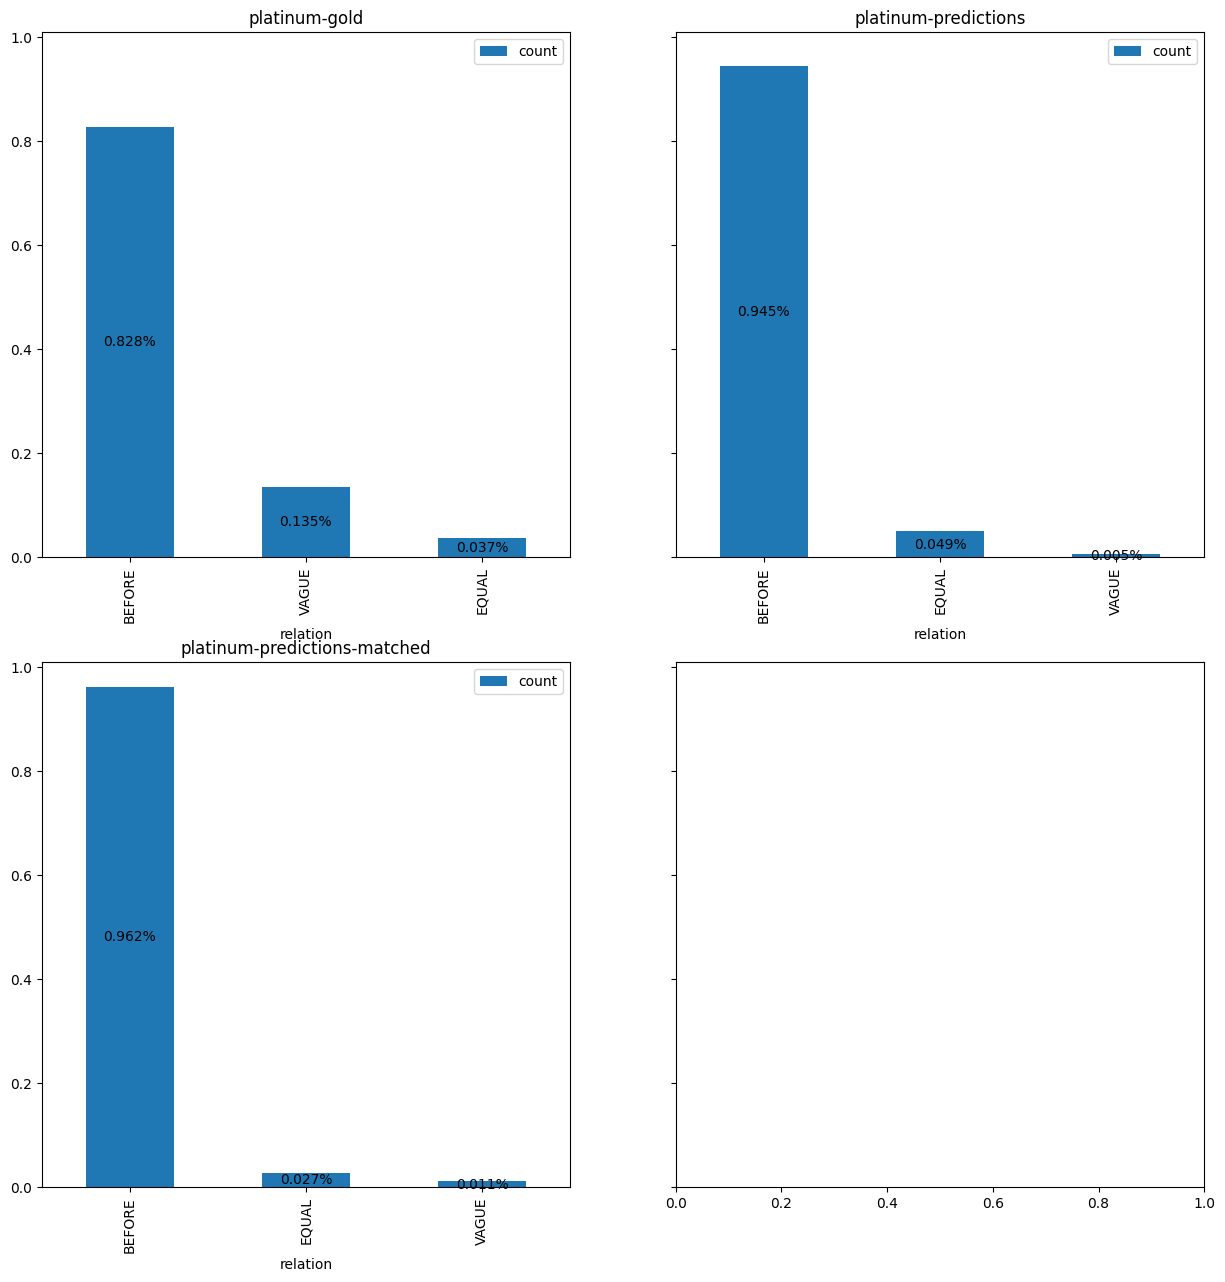

In [14]:
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(15, 15))
gold_relation_df = plot_relation_bars(df=gold_df, ax=axes[0][0], title='platinum-gold')
preds_relation_df = plot_relation_bars(df=preds_df, ax=axes[0][1], title='platinum-predictions')
matched_preds_relation_df = plot_relation_bars(df=matched_preds, ax=axes[1][0], title='platinum-predictions-matched')

In [30]:
cycles_score = df_results[['docid', 'n_cycles']].drop_duplicates()['n_cycles'].sum() / df_results['docid'].nunique()
print(f'there is a {cycles_score * 100}% chance for a cycle')

there is a 0.0% chance for a cycle


In [12]:
relevant_gold_df = pd.merge(gold_df, matched_preds[['docid', 'unique_id']], how='inner', on=['docid', 'unique_id'])
metrics_gold_df = (relevant_gold_df[['docid', 'unique_id', 'relation']]
                   # .replace({'BEFORE': 'before_after', 'AFTER': 'before_after'})
                   .sort_values(['docid', 'unique_id']))

metrics_matched_preds_df = (matched_preds
                            # .replace({'BEFORE': 'before_after', 'AFTER': 'before_after'})
                            .sort_values(['docid', 'unique_id']))

# metrics_matched_preds_df = pd.get_dummies(metrics_matched_preds_df, columns=['relation'], dtype=int)
# metrics_gold_df = pd.get_dummies(metrics_gold_df, columns=['relation'], dtype=int)

preds_np = metrics_matched_preds_df[[col_name for col_name in metrics_matched_preds_df.columns if col_name.startswith('relation')]].to_numpy()
gold_np = metrics_gold_df[[col_name for col_name in metrics_gold_df.columns if col_name.startswith('relation')]].to_numpy()

mcm = multilabel_confusion_matrix(gold_np, preds_np, labels=['BEFORE', 'VAGUE', 'EQUAL'])
mcm

array([[[  1,  24],
        [  6, 154]],

       [[167,   2],
        [ 16,   0]],

       [[172,   4],
        [  8,   1]]])

In [32]:
# Convert each confusion matrix to a DataFrame and concatenate them
df_list = []
labels=['before_after', 'UNIQUE', 'EQUAL']
for i, cm in enumerate(mcm):
    df_cm = pd.DataFrame(cm, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])
    df_cm['Label'] = labels[i]
    df_list.append(df_cm)

# Concatenate all DataFrames
df_mcm = pd.concat(df_list)

before_after_styler = df_mcm[df_mcm.Label == 'before_after'].style.set_table_attributes("style='display:inline'").set_caption('before_after')
UNIQUE_styler = df_mcm[df_mcm.Label == 'UNIQUE'].style.set_table_attributes("style='display:inline'").set_caption('UNIQUE')
EQUAL_styler = df_mcm[df_mcm.Label == 'EQUAL'].style.set_table_attributes("style='display:inline'").set_caption('EQUAL')

display_html(before_after_styler._repr_html_() 
             + UNIQUE_styler._repr_html_() 
             + EQUAL_styler._repr_html_(), 
             raw=True)

,Predicted Negative,Predicted Positive,Label
True Negative,1,24,before_after
True Positive,6,154,before_after
,Predicted Negative,Predicted Positive,Label
True Negative,167,2,UNIQUE
True Positive,16,0,UNIQUE
,Predicted Negative,Predicted Positive,Label
True Negative,172,4,EQUAL
True Positive,8,1,EQUAL


In [15]:
from IPython.display import display_html

gold_relation_styler = gold_relation_df.style.set_table_attributes("style='display:inline'").set_caption('gold')
preds_relation_styler = preds_relation_df.style.set_table_attributes("style='display:inline'").set_caption('predictions')
matched_preds_relation_styler = matched_preds_relation_df.style.set_table_attributes("style='display:inline'").set_caption('preds-matched')

display_html(gold_relation_styler._repr_html_() 
             + preds_relation_styler._repr_html_() 
             + matched_preds_relation_styler._repr_html_(), 
             raw=True)

,relation,count
0,BEFORE,693
1,VAGUE,113
2,EQUAL,31
,relation,count
0,BEFORE,537
1,EQUAL,28
2,VAGUE,3
,relation,count
0,BEFORE,178
1,EQUAL,5


In [9]:
relation_table(gold_df, preds_df, model_name)

gemini-1.5-pro                                  
                              BEFORE EQUAL VAGUE no_predictions    sum
gold-labeled BEFORE            154.0   4.0   2.0          533.0  693.0
             EQUAL               8.0   1.0   0.0           22.0   31.0
             VAGUE              16.0   0.0   0.0           97.0  113.0
             no_label          359.0  23.0   1.0            0.0  383.0
             sum               537.0  28.0   3.0          652.0    NaN

# Gemini-1.5-Flash

In [5]:
model_name = 'gemini-1.5-flash'

## Zero-Shot

In [6]:
method = 'zero-shot'

In [7]:
df_flash_results = pd.read_csv(TRC_RESULTS_PATH / method / f'platinum-results-{model_name}.csv')
preds_zero_flash_df = (df_flash_results[['docid', 'unique_id', 'relation_selected']]
            .copy()
            .dropna()
            .drop_duplicates()
            .rename({'relation_selected': 'relation'}, axis='columns'))


relation_table(gold_df, preds_zero_flash_df, model_name)

gemini-1.5-flash                                  
                                BEFORE EQUAL VAGUE no_predictions    sum
gold-labeled BEFORE              141.0   0.0   0.0          552.0  693.0
             EQUAL                 4.0   0.0   0.0           27.0   31.0
             VAGUE                10.0   0.0   0.0          103.0  113.0
             no_label            666.0   0.0   0.0            0.0  666.0
             sum                 821.0   0.0   0.0          682.0    NaN

In [8]:
matched_preds = pd.merge(preds_zero_flash_df, gold_df[['docid', 'unique_id']], how='inner', on=['docid', 'unique_id'])
gold_covarage = matched_preds.shape[0] / gold_df.shape[0] * 100
print(f'the covarage of the model is {gold_covarage:.2f}%')

the covarage of the model is 18.52%


In [17]:
cycles_score = df_flash_results[['docid', 'n_cycles']].drop_duplicates()['n_cycles'].sum() / df_flash_results['docid'].nunique()
print(f'there is a {cycles_score * 100}% chance for a cycle')

there is a 0.0% chance for a cycle


## Few-Shot

In [9]:
method = 'few-shot'

In [10]:
df_results = pd.read_csv(TRC_RESULTS_PATH / method / f'platinum-results-{model_name}.csv')
df_results

,docid,verb1,verb2,eiid1,eiid2,relation,unique_id,model_name,n_iter,score,relation_selected,max_score,ccr,scr,n_cycles,min_vote
0,AP_20130322,killed,started,e2,e3,BEFORE,e2-e3,gemini-1.5-flash,0.0,1,BEFORE,5.0,0.121212,1.0,NaN,3
1,AP_20130322,started,sparking,e3,e4,BEFORE,e3-e4,gemini-1.5-flash,0.0,1,BEFORE,5.0,0.121212,1.0,NaN,3
2,AP_20130322,started,turn,e3,e5,BEFORE,e3-e5,gemini-1.5-flash,0.0,1,BEFORE,5.0,0.121212,1.0,NaN,3
3,AP_20130322,started,ended,e3,e6,BEFORE,e3-e6,gemini-1.5-flash,0.0,1,NaN,NaN,0.121212,1.0,NaN,3
4,AP_20130322,started,according,e3,e7,BEFORE,e3-e7,gemini-1.5-flash,0.0,1,NaN,NaN,0.121212,1.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14204,nyt_20130322_strange_computer,tell,react,e28,e29,BEFORE,e28-e29,gemini-1.5-flash,4.0,1,BEFORE,5.0,0.000000,1.0,NaN,3
14205,nyt_20130322_strange_computer,react,burst,e29,e30,BEFORE,e29-e30,gemini-1.5-flash,4.0,1,BEFORE,5.0,0.000000,1.0,NaN,3
14206,nyt_20130322_strange_computer,react,pulse,e29,e31,BEFORE,e29-e31,gemini-1.5-flash,4.0,1,BEFORE,5.0,0.000000,1.0,NaN,3
14207,nyt_20130322_strange_computer,burst,pulse,e30,e31,VAGUE,e30-e31,gemini-1.5-flash,4.0,1,NaN,NaN,0.000000,1.0,NaN,3


In [11]:
preds_df = (df_results[['docid', 'unique_id', 'relation_selected']]
            .copy()
            .dropna()
            .drop_duplicates()
            .rename({'relation_selected': 'relation'}, axis='columns'))
preds_df

,docid,unique_id,relation
0,AP_20130322,e2-e3,BEFORE
1,AP_20130322,e3-e4,BEFORE
2,AP_20130322,e3-e5,BEFORE
5,AP_20130322,e4-e5,BEFORE
8,AP_20130322,e5-e6,BEFORE
...,...,...,...
14021,nyt_20130322_strange_computer,e25-e27,BEFORE
14022,nyt_20130322_strange_computer,e28-e29,BEFORE
14023,nyt_20130322_strange_computer,e29-e30,BEFORE
14024,nyt_20130322_strange_computer,e29-e31,BEFORE


In [12]:
matched_preds = pd.merge(preds_df, gold_df[['docid', 'unique_id']], how='inner', on=['docid', 'unique_id'])
gold_covarage = matched_preds.shape[0] / gold_df.shape[0] * 100
print(f'the covarage of the model is {gold_covarage:.2f}%')

the covarage of the model is 21.98%


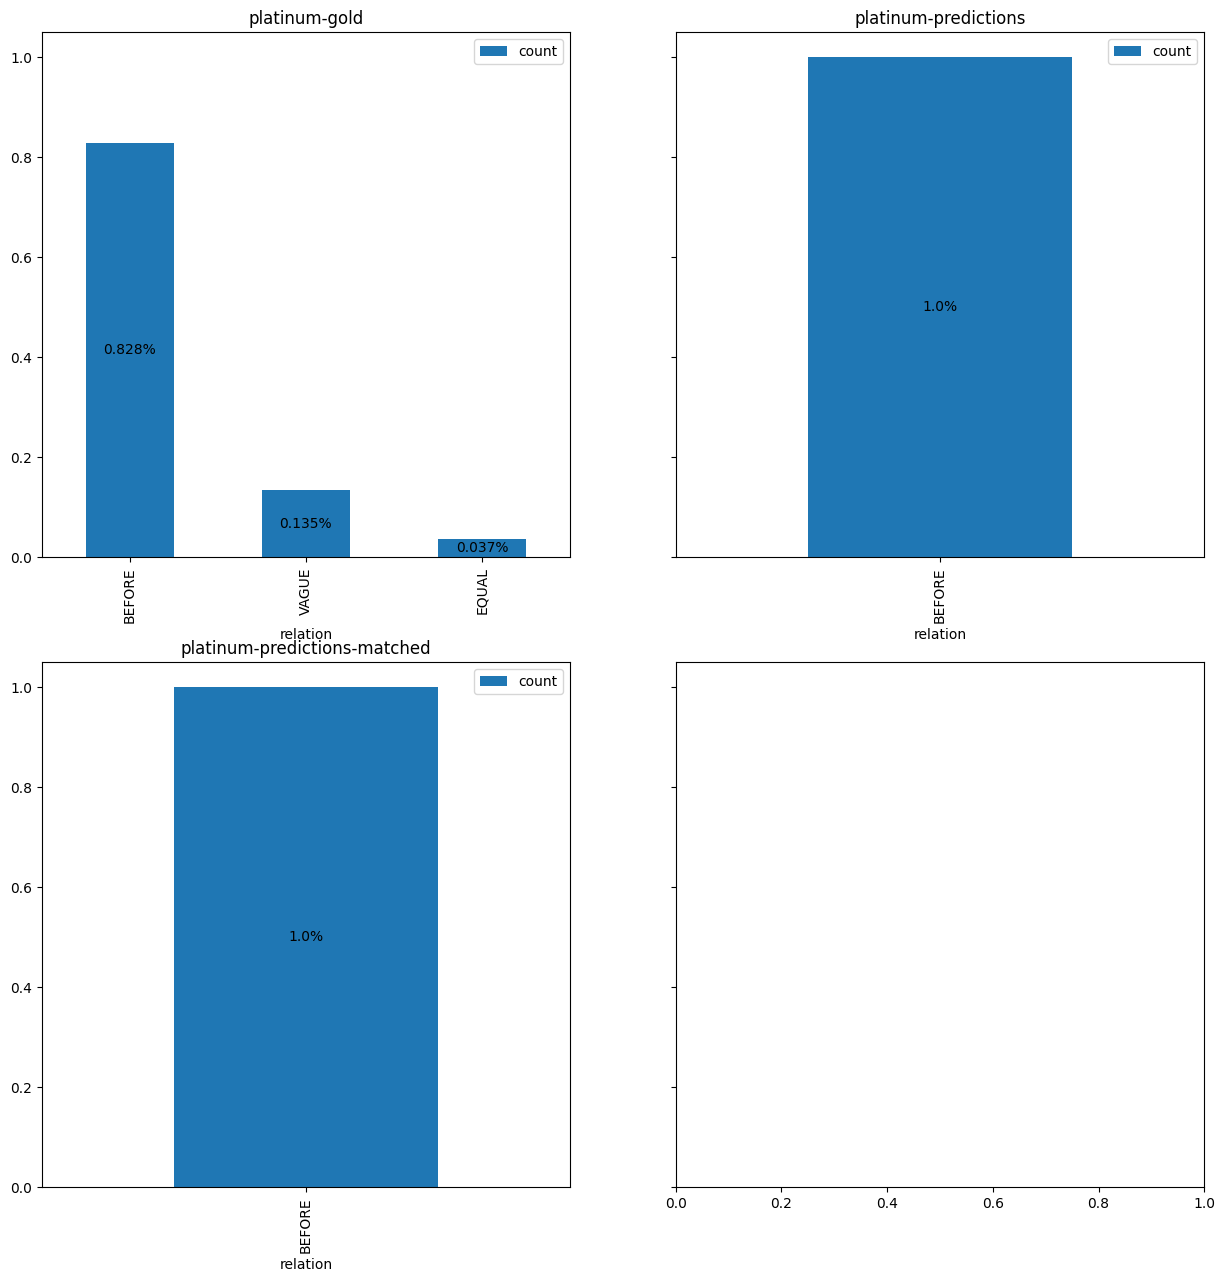

In [43]:
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(15, 15))
gold_relation_df = plot_relation_bars(df=gold_df, ax=axes[0][0], title='platinum-gold')
preds_relation_df = plot_relation_bars(df=preds_df, ax=axes[0][1], title='platinum-predictions')
matched_preds_relation_df = plot_relation_bars(df=matched_preds, ax=axes[1][0], title='platinum-predictions-matched')

In [44]:
matched_preds_relation_df = plot_relation_bars(df=matched_preds, ax=axes[1][0], title='platinum-predictions-matched')
from IPython.display import display_html

gold_relation_styler = gold_relation_df.style.set_table_attributes("style='display:inline'").set_caption('gold')
preds_relation_styler = preds_relation_df.style.set_table_attributes("style='display:inline'").set_caption(
    'predictions')
matched_preds_relation_styler = matched_preds_relation_df.style.set_table_attributes(
    "style='display:inline'").set_caption('preds-matched')

display_html(gold_relation_styler._repr_html_()
             + preds_relation_styler._repr_html_()
             + matched_preds_relation_styler._repr_html_(),
             raw=True)

,relation,count
0,BEFORE,693
1,VAGUE,113
2,EQUAL,31
,relation,count
0,BEFORE,1265
,relation,count
0,BEFORE,184


In [45]:
cycles_score = df_results[['docid', 'n_cycles']].drop_duplicates()['n_cycles'].sum() / df_results['docid'].nunique()
print(f'there is a {cycles_score * 100}% chance for a cycle')

there is a 0.0% chance for a cycle


In [129]:
relevant_gold_df = pd.merge(gold_df, matched_preds[['docid', 'unique_id']], how='inner', on=['docid', 'unique_id'])
metrics_gold_df = (relevant_gold_df[['docid', 'unique_id', 'relation']]
                   .replace({'BEFORE': 'before_after', 'AFTER': 'before_after'})
                   .sort_values(['docid', 'unique_id']))

metrics_matched_preds_df = (matched_preds.replace({'BEFORE': 'before_after', 'AFTER': 'before_after'})
                            .sort_values(['docid', 'unique_id']))

# metrics_matched_preds_df = pd.get_dummies(metrics_matched_preds_df, columns=['relation'], dtype=int)
# metrics_gold_df = pd.get_dummies(metrics_gold_df, columns=['relation'], dtype=int)

preds_np = metrics_matched_preds_df[[col_name for col_name in metrics_matched_preds_df.columns if col_name.startswith('relation')]].to_numpy()
gold_np = metrics_gold_df[[col_name for col_name in metrics_gold_df.columns if col_name.startswith('relation')]].to_numpy()

mcm = multilabel_confusion_matrix(gold_np, preds_np, labels=['before_after', 'UNIQUE', 'EQUAL'])
mcm

array([[[  2,  96],
        [ 10, 475]],

       [[583,   0],
        [  0,   0]],

       [[559,   0],
        [ 24,   0]]])

In [130]:
# Convert each confusion matrix to a DataFrame and concatenate them
df_list = []
labels=['before_after', 'UNIQUE', 'EQUAL']
for i, cm in enumerate(mcm):
    df_cm = pd.DataFrame(cm, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])
    df_cm['Label'] = labels[i]
    df_list.append(df_cm)

# Concatenate all DataFrames
df_mcm = pd.concat(df_list)

before_after_styler = df_mcm[df_mcm.Label == 'before_after'].style.set_table_attributes("style='display:inline'").set_caption('before_after')
UNIQUE_styler = df_mcm[df_mcm.Label == 'UNIQUE'].style.set_table_attributes("style='display:inline'").set_caption('UNIQUE')
EQUAL_styler = df_mcm[df_mcm.Label == 'EQUAL'].style.set_table_attributes("style='display:inline'").set_caption('EQUAL')

display_html(before_after_styler._repr_html_() 
             + UNIQUE_styler._repr_html_() 
             + EQUAL_styler._repr_html_(), 
             raw=True)

,Predicted Negative,Predicted Positive,Label
True Negative,2,96,before_after
True Positive,10,475,before_after
,Predicted Negative,Predicted Positive,Label
True Negative,583,0,UNIQUE
True Positive,0,0,UNIQUE
,Predicted Negative,Predicted Positive,Label
True Negative,559,0,EQUAL
True Positive,24,0,EQUAL


In [133]:
irrelevant_preds_df = pd.merge(matched_preds, gold_df[['docid', 'unique_id']], how='left', on=['docid', 'unique_id'])
irrelevant_preds_df.relation.value_counts()

relation
BEFORE    561
VAGUE      12
AFTER      10
Name: count, dtype: int64

In [135]:
undetected_df = pd.merge(gold_df, matched_preds[['docid', 'unique_id']], how='left', on=['docid', 'unique_id']).replace({'AFTER': 'BEFORE'})
undetected_df.relation.value_counts()

relation
BEFORE    693
VAGUE     113
EQUAL      31
Name: count, dtype: int64

In [146]:
relevant_preds_df = pd.merge(matched_preds, gold_df[['docid', 'unique_id']], how='inner', on=['docid', 'unique_id']).replace({'AFTER': 'BEFORE'})
relevant_preds_df

,docid,unique_id,relation
0,AP_20130322,e2-e3,BEFORE
1,AP_20130322,e3-e4,BEFORE
2,AP_20130322,e3-e6,BEFORE
3,AP_20130322,e3-e7,BEFORE
4,AP_20130322,e4-e6,BEFORE
...,...,...,...
578,nyt_20130322_strange_computer,e22-e23,BEFORE
579,nyt_20130322_strange_computer,e11-e8,BEFORE
580,nyt_20130322_strange_computer,e14-e16,BEFORE
581,nyt_20130322_strange_computer,e19-e22,BEFORE


In [172]:
irrelevant_preds_df = pd.merge(preds_df, gold_df[['docid', 'unique_id']], how='left', on=['docid', 'unique_id'])
irrelevant_preds = irrelevant_preds_df.replace({'AFTER': 'BEFORE'}).relation.value_counts()

relation = ['BEFORE', 'EQUAL', 'VAGUE']
results = pd.DataFrame(index=relation, columns=relation + ['extra_predictions'])
relevant_preds_df = pd.merge(preds_df, gold_df[['docid', 'unique_id']], how='inner', on=['docid', 'unique_id']).replace({'AFTER': 'BEFORE'})
for relation, group in gold_df.replace({'AFTER': 'BEFORE'}).groupby('relation'):
    relevant_gold_df = pd.merge(relevant_preds_df, group[['docid', 'unique_id']], how='inner', on=['docid', 'unique_id'])
    group_value_counts = relevant_gold_df.relation.value_counts() 
    group_value_counts['extra_predictions'] = irrelevant_preds[relation] if relation in irrelevant_preds else 0
    results.loc[relation] = group_value_counts


undetected_df = pd.merge(gold_df, preds_df[['docid', 'unique_id']], how='left', on=['docid', 'unique_id']).replace({'AFTER': 'BEFORE'})
results.loc['no_predictions'] = undetected_df.relation.value_counts()
results

,BEFORE,EQUAL,VAGUE,extra_predictions
BEFORE,475.0,NaN,10.0,6356.0
EQUAL,24.0,NaN,NaN,0.0
VAGUE,72.0,NaN,2.0,162.0
no_predictions,693.0,31.0,113.0,NaN


In [13]:
finale_relation_df = relation_table(gold_df, preds_df, model_name)
finale_relation_df

gemini-1.5-flash                                   
                                BEFORE EQUAL VAGUE no_predictions     sum
gold-labeled BEFORE              158.0   0.0   0.0          535.0   693.0
             EQUAL                 7.0   0.0   0.0           24.0    31.0
             VAGUE                19.0   0.0   0.0           94.0   113.0
             no_label           1081.0   0.0   0.0            0.0  1081.0
             sum                1265.0   0.0   0.0          653.0     NaN